In [1]:
import pandas as pd

# List of file paths
file_paths = ['/uoa/home/t05cj23/sharedscratch/main/output/ID1/result_filtered_df1.csv', '/uoa/home/t05cj23/sharedscratch/main/output/ID2/result_filtered_df2.csv',
              '/uoa/home/t05cj23/sharedscratch/main/output/ID4/result_filtered_df3.csv', '/uoa/home/t05cj23/sharedscratch/main/output/ID4/result_filtered_df4.csv',
              '/uoa/home/t05cj23/sharedscratch/main/output/ID5/result_filtered_df5.csv']

# Load all CSV files into DataFrames
dataframes = [pd.read_csv(file_path) for file_path in file_paths]

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Drop rows with NaN values in 'age' or 'mutation_rate'
combined_df = combined_df.dropna(subset=['age', 'mutation_rate'])

# Ensure 'celltype' column is treated as categorical
combined_df['celltype'] = combined_df['celltype'].astype('category')

display(combined_df)


,Unnamed: 0,SOC_indiv_ID,celltype,total_cell_type_count,mut_cell_type_count,mutation_rate,batchID,age
0,0,HMN83553,B,41,1.0,3.784709e-10,B1_c1,53
1,2,HMN83553,CD4_T,932,11.0,1.831442e-10,B1_c1,53
2,4,HMN83553,CD8_T,153,3.0,3.042609e-10,B1_c1,53
3,6,HMN83554,CD4_T,411,2.0,7.551002e-11,B1_c1,41
4,8,HMN83554,CD8_T,173,4.0,3.587817e-10,B1_c1,41
...,...,...,...,...,...,...,...,...
66,15,HMN83552,infected_monocytes,103,1.0,1.506535e-10,B1_c2,54
67,17,HMN83552,monocytes,56,1.0,2.770948e-10,B1_c2,54
68,19,HMN83558,B,142,5.0,5.463841e-10,B1_c2,47
69,21,HMN83558,CD4_T,653,9.0,2.138680e-10,B1_c2,47


In [2]:
# Count data points for each cell type
cell_type_counts = combined_df['celltype'].value_counts()

# Filter cell types with at least 3 data points
valid_cell_types = cell_type_counts[cell_type_counts >= 3].index

# Filter combined DataFrame to include only valid cell types
filtered_df = combined_df[combined_df['celltype'].isin(valid_cell_types)]

display(filtered_df)

,Unnamed: 0,SOC_indiv_ID,celltype,total_cell_type_count,mut_cell_type_count,mutation_rate,batchID,age
0,0,HMN83553,B,41,1.0,3.784709e-10,B1_c1,53
1,2,HMN83553,CD4_T,932,11.0,1.831442e-10,B1_c1,53
2,4,HMN83553,CD8_T,153,3.0,3.042609e-10,B1_c1,53
3,6,HMN83554,CD4_T,411,2.0,7.551002e-11,B1_c1,41
4,8,HMN83554,CD8_T,173,4.0,3.587817e-10,B1_c1,41
...,...,...,...,...,...,...,...,...
66,15,HMN83552,infected_monocytes,103,1.0,1.506535e-10,B1_c2,54
67,17,HMN83552,monocytes,56,1.0,2.770948e-10,B1_c2,54
68,19,HMN83558,B,142,5.0,5.463841e-10,B1_c2,47
69,21,HMN83558,CD4_T,653,9.0,2.138680e-10,B1_c2,47


/tmp/ipykernel_1276955/1858406345.py:48: UserWarning: 
The palette list has fewer values (7) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=filtered_df, x='age', y='mutation_rate', hue='celltype', palette=palette, marker='o')


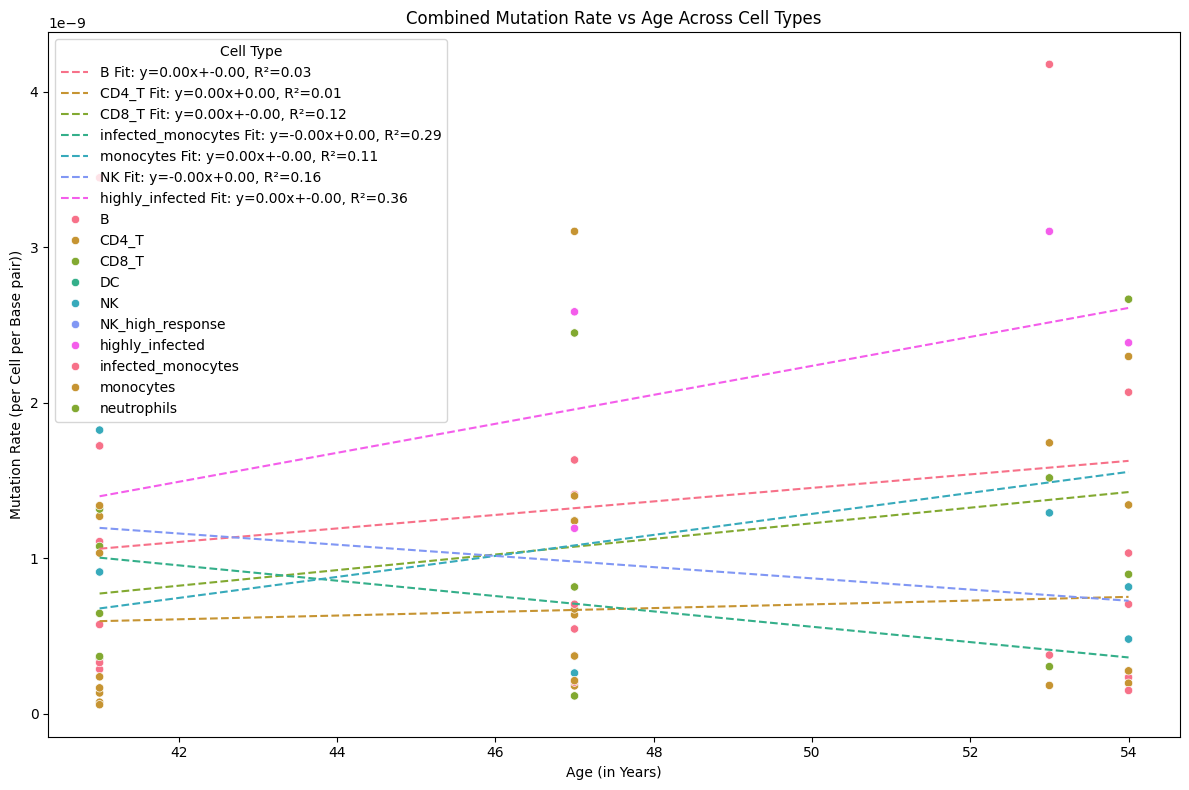

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Define a color palette for valid cell types
cell_types = filtered_df['celltype'].unique()
palette = sns.color_palette("husl", len(cell_types))

# Initialize a list to hold summary data
summary_data = []

# Create the plot
plt.figure(figsize=(12, 8))

# Plot each valid cell type with different colors
for i, cell_type in enumerate(cell_types):
    cell_subset = filtered_df[filtered_df['celltype'] == cell_type]
    
    # Check if cell_subset is not empty
    if cell_subset.empty:
        continue
    
    # Check if there is variation in 'age' values
    if len(cell_subset['age'].unique()) > 1:
        # Fit line of best fit
        slope, intercept, r_value, _, _ = stats.linregress(cell_subset['age'], cell_subset['mutation_rate'])
        
        # Append to summary data
        summary_data.append({
            'Cell Type': cell_type,
            'Slope': slope,
            'Intercept': intercept,
            'R²': r_value**2
        })
        
        # Generate line of best fit
        age_range = np.linspace(cell_subset['age'].min(), cell_subset['age'].max(), 100)
        mutation_rate_fit = intercept + slope * age_range
        
        # Plot line of best fit with label
        plt.plot(age_range, mutation_rate_fit, color=palette[i], linestyle='--',
                 label=f'{cell_type} Fit: y={slope:.2f}x+{intercept:.2f}, R²={r_value**2:.2f}')
    else:
        print(f"Not enough variation in 'age' values for cell type: {cell_type}")

# Plot scatter points for each cell type
sns.scatterplot(data=filtered_df, x='age', y='mutation_rate', hue='celltype', palette=palette, marker='o')

# Set titles and labels
plt.title('Combined Mutation Rate vs Age Across Cell Types')
plt.xlabel('Age (in Years)')
plt.ylabel('Mutation Rate (per Cell per Base pair))')
plt.legend(title='Cell Type')

# Adjust layout to prevent overlap and show plot
plt.tight_layout()
plt.show()

# Create a DataFrame from the summary data
summary_df = pd.DataFrame(summary_data)

In [4]:
# Create a DataFrame from the summary data
summary_df = pd.DataFrame(summary_data)

# Save the summary DataFrame to a CSV file
summary_df.to_csv('combined_summary_data.csv', index=False)

# Display the summary DataFrame
display(summary_df)


,Cell Type,Slope,Intercept,R²
0,B,4.345747e-11,-7.192065e-10,0.031767
1,CD4_T,1.201413e-11,1.040028e-10,0.010629
2,CD8_T,5.019819e-11,-1.283802e-09,0.116994
3,infected_monocytes,-4.935883e-11,3.028559e-09,0.292528
4,monocytes,6.756256e-11,-2.091668e-09,0.113833
5,NK,-3.605561e-11,2.674741e-09,0.159373
6,highly_infected,9.318054e-11,-2.420628e-09,0.355281
